### Usage Time: Измерение времени работы функции

Важным критерием оценки алгоритмов является время их работы. 
Для оценки времени работы функции можно использовать приведенный здесь декоратор.

In [1]:
# %load usage_time.py
#!/usr/bin/env python

"""Usage Time

Project: TryPython
A collection of educational materials for learning the Python

Author: Alexander Krasnikov aka askras
Website: trypython.pro

License: BSD 3 clause
"""

import functools
import timeit
import typing


def get_usage_time(number: int = 1,
                   setup: str = "pass",
                   ndigits: int = 3) -> typing.Callable:
    """Decorator for measuring the speed of the function (in seconds)q

    Parameters
    ----------
    number : int, default=1
        Number of code repetitions.
    setup : str, default="pass"
        Code executed once before timing.
    ndigits : int, default=3
        Number of decimal places in the returned value.

    Returns
    -------
    decorator: typing.Callable
        Decorator for measuring the time of the function in seconds.

    See Also
    --------
    timeit
        Measure execution time of small code snippets.

    References
    ----------
    [1] timeit documentation : https://docs.python.org/3/library/timeit.html

    Examples
    --------
    Decorating an existing function:

    >>> import time
    >>> def f(n):
    ...     time.sleep(n)
    ...     return n
    ...
    >>> f1 = get_usage_time()(f)
    >>> print(f"The function was executed for {f1(2)} seconds")
    The function was executed for 2.0 seconds
    >>> get_usage_time()(f)(4)
    4.0

    Measuring the running time of a function for different parameter values:

    >>> import time
    >>> def f(n):
    ...     time.sleep(n)
    ...     return n
    ...
    >>> for n in range(1,4):
    ...    f2 = get_usage_time(number=2)(f)
    ...    print(f2(n))
    1.0
    2.0
    3.0

    Using the `setup` option:

    >>> import time
    >>> def f(n):
    ...     time.sleep(n)
    ...     return n
    ...
    >>> number = 5
    >>> setup = "print('Start setup'); time.sleep(10); print('End setup')"
    >>> f3 =  get_usage_time(number=number, setup=setup)(f)
    >>> print(f3(3))
    Start setup
    End setup
    3.0

    Decoding the generated function:

    >>> import time
    >>> @get_usage_time(number=2, setup="print('Start');", ndigits=0)
    ... def f(n):
    ...    time.sleep(n)
    ...    return n
    ...
    >>> t = f(3)
    Start
    >>> print(t)
    3.0
    """

    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = timeit.timeit(
                lambda: func(*args, **kwargs),
                setup=setup,  # code to be executed once at the beginning of the experiment
                number=number,  # number of repetitions
            )
            return round(usage_time / number, ndigits)
        return wrapper
    return decorator


if __name__ == "__main__":
    import time

    def f(n):
        time.sleep(n)
        return n

    for i in range(1, 4):
        f1 = get_usage_time(number=3)(f)
        print(f1(i))


1.0
2.0
3.0


#### Пример использования

In [2]:
import random

def my_func(n):
    L = [random.randint(1, 1000) for _ in range(n)]
    return sorted(L)

In [3]:
# WARNING. It may take a few minutes.
func = get_usage_time(ndigits=5)(my_func)
for i in range(1, 9): # Replace 9 with a smaller number to speed up
    print(f"The function was executed for {func(10**i)} seconds at n=10^{i}.")


The function was executed for 3e-05 seconds at n=10^1.
The function was executed for 6e-05 seconds at n=10^2.
The function was executed for 0.00065 seconds at n=10^3.
The function was executed for 0.00871 seconds at n=10^4.
The function was executed for 0.07946 seconds at n=10^5.
The function was executed for 0.63112 seconds at n=10^6.
The function was executed for 6.66879 seconds at n=10^7.
The function was executed for 65.54227 seconds at n=10^8.


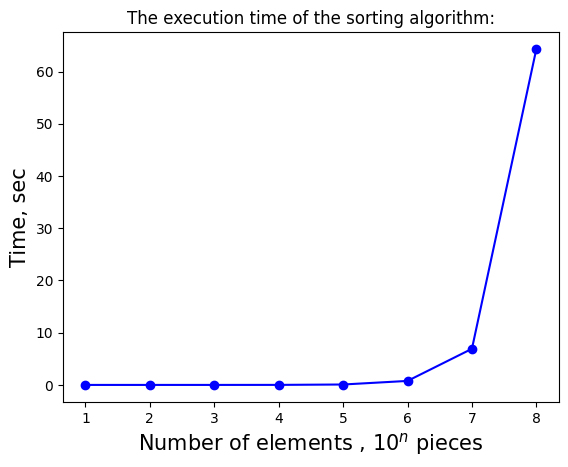

In [4]:
# WARNING. It may take a few minutes.

import matplotlib.pyplot as plt
%matplotlib inline

func = get_usage_time(ndigits=5)(my_func)

items = range(1, 9) # Replace 9 with a smaller number to speed up
times = [func(10**i) for i in items]

fig = plt.plot(items, times, "bo-") 
plt.title("The execution time of the sorting algorithm:")
ax = plt.gca()
ax.set_xlabel("Number of elements , $10^n$ pieces", fontsize=15,)
ax.set_ylabel("Time, sec", fontsize=15,)
plt.show()

#### Исследование программы
Попробуйте найти ответы на следующие вопросы. 
Поэкспериментируйте с изменениями кода и запустите программу снова, чтобы увидеть, как они повлияют на ее работу.

1. Модифицируйте декоратор для того чтобы получать значение времени в милисекундах (микросекундах).


#### Ссылки

1. Документация timeit: https://docs.python.org/3/library/timeit.html